In [43]:
import warnings #figyelmeztető üzenetek eltüntetése/figyelmen kívül hagyása
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
#Ha mégis lenne warning üzenet, akkor run menüpont-> run all cells (ezt kétszer kell) és eltűnnek a warningok.

In [44]:
#csomagok betöltése
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [45]:
#CSV állományok betöltése
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [46]:
#adatok megtekintése
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
#üres adatok megtekintése
nans = train.shape[0] - train.dropna().shape[0]
print ("%d rows have missing values in the train data" %nans)

nand = test.shape[0] - test.dropna().shape[0]
print ("%d rows have missing values in the test data" %nand)

2399 rows have missing values in the train data
1221 rows have missing values in the test data


In [48]:
#üres adatok részletes információ
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

In [49]:
#kcross validáció függvény
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  
  #Pontosság kiiratása
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data):
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
  #Cross validáció eredmény
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
  model.fit(data[predictors],data[outcome])


In [50]:
#Olyan sorok össze gyűlytése amibe van olyan érték ami nincs megadva - TRAIN
train = train[train.isna().any(axis=1)]

In [51]:
#Olyan sorok össze gyűlytése amibe van olyan érték ami nincs megadva - TEST
test = test[test.isna().any(axis=1)]

In [52]:
#üres adatok részletes információ
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

In [53]:
#Hiányzó adatok feltöltése az első értékkel
test['workclass'].fillna('Private', inplace=True)
test['occupation'].fillna('Private', inplace=True)
test['native.country'].fillna('United-States', inplace=True)

In [54]:
#üres adatok részletes információ
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

In [55]:
#Hiányzó adatok feltöltése az első értékkel
train['workclass'].fillna('Private', inplace=True)
train['occupation'].fillna('Private', inplace=True)
train['native.country'].fillna('United-States', inplace=True)

In [56]:
#üres adatok ellenőrzése - TRAIN
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
target            0
dtype: int64

In [57]:
#üres adatok ellenőrzése - Test
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
target            0
dtype: int64

Mint látható, mindkét adathalmaznál sikerült az első értékekkel való feltöltés

In [58]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K
27,54,Private,180211,Some-college,10,Married-civ-spouse,Private,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,United-States,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States,<=50K
61,32,Private,293936,7th-8th,4,Married-spouse-absent,Private,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [59]:
#A validáció futattásához át kell alakítani a nem szám alapú értékeket számmá a test adathalmazban.
from sklearn.preprocessing import LabelEncoder
var_mod_test = ['workclass','marital.status','occupation','relationship','race','sex','native.country','education', 'target']

le_test = LabelEncoder()
for ii in var_mod_test:
    test[ii] = le_test.fit_transform(test[ii])
test.dtypes 

age               int64
workclass         int64
fnlwgt            int64
education         int64
education.num     int64
marital.status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int64
target            int64
dtype: object

In [60]:
#A validáció futattásához át kell alakítani a nem szám alapú értékeket számmá a train adathalnazban is.
from sklearn.preprocessing import LabelEncoder
var_mod_test = ['workclass','marital.status','occupation','relationship','race','sex','native.country','education', 'target']

le_test = LabelEncoder()
for ii in var_mod_test:
    train[ii] = le_test.fit_transform(train[ii])
train.dtypes 

age               int64
workclass         int64
fnlwgt            int64
education         int64
education.num     int64
marital.status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int64
target            int64
dtype: object

In [61]:
#Meghívás a trainre is
var_mod_train = ['workclass','marital.status','occupation','relationship','race','sex','native.country','education', 'target']
le_train = LabelEncoder()
for ii in var_mod_train:
    train[ii] = le_train.fit_transform(train[ii].astype(str))
train.dtypes 

age               int64
workclass         int64
fnlwgt            int64
education         int64
education.num     int64
marital.status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int64
target            int64
dtype: object

In [62]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
14,40,3,121772,14,11,2,1,0,1,1,0,0,40,28,1
27,54,7,180211,7,10,2,5,0,1,1,0,0,60,21,1
38,31,3,84154,7,10,2,2,0,4,1,0,0,38,28,1
51,18,3,226956,3,9,4,10,3,4,0,0,0,30,28,0
61,32,7,293936,11,4,3,5,1,4,1,0,0,40,28,0


In [63]:
#Validáció meghívása csak a korosztályra
outcome_var = 'target'
model = LogisticRegression()
predictor_var = ['education.num']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 86.703%
Cross-Validation Score : 86.452%


In [64]:
#Összes változóval tesztelve
model = RandomForestClassifier(n_estimators=20)
predictor_var = ['age','workclass','fnlwgt','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 99.750%
Cross-Validation Score : 89.870%


In [65]:
#Váltzók befolyásoló tényezője
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

fnlwgt            0.168415
age               0.150190
capital.gain      0.143031
education.num     0.133202
hours.per.week    0.101908
relationship      0.090736
marital.status    0.059117
occupation        0.046027
capital.loss      0.042351
workclass         0.020441
race              0.020344
native.country    0.016894
sex               0.007344
dtype: float64


In [66]:
# Decision tree-vel tesztelve, de túl tanítva
model = DecisionTreeClassifier(random_state=0)
predictor_var = ['age','workclass','fnlwgt','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 85.577%


In [67]:
# Decision tree a túltanulás csökkentésével és közben sikerült a cross validációt javítani.
model = DecisionTreeClassifier(random_state=0, min_samples_split=20, max_depth=20, max_features=2, min_samples_leaf=2)
predictor_var = ['fnlwgt','age','capital.gain','education.num','relationship']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 92.872%
Cross-Validation Score : 88.870%


In [68]:
#1-es feladatban lévő optimalizált tanítás
model = RandomForestClassifier(n_estimators=100, min_samples_split=20, max_depth=20, max_features=2, min_samples_leaf=2)
predictor_var = ['fnlwgt','age','capital.gain','education.num','relationship']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 92.330%
Cross-Validation Score : 89.871%


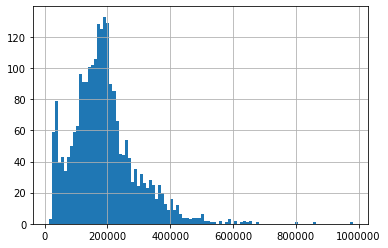

In [69]:
#Szélső értékek keresése (fnlwgt-t választottam ismét)
train['fnlwgt'].hist(bins=100)

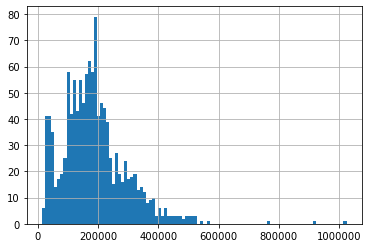

In [70]:
test['fnlwgt'].hist(bins=100)

In [71]:
#szélsőérékek levágása
train['fnlwgt_log'] = np.log(train['fnlwgt'])
test['fnlwgt_log'] = np.log(test['fnlwgt'])

A levágás utáni hisztrogramm


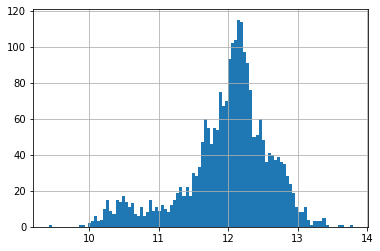

In [72]:
print("A levágás utáni hisztrogramm")
train['fnlwgt_log'].hist(bins=100)

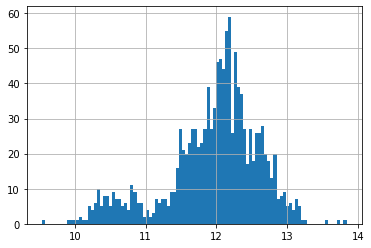

In [73]:
test['fnlwgt_log'].hist(bins=100)

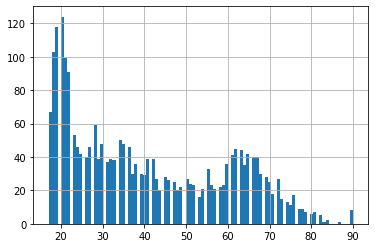

In [74]:
#kor szélsőréték megtekintése
train['age'].hist(bins=100)

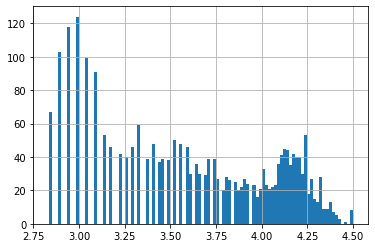

In [75]:
#További szélső értékek levágása
train['age_log'] = np.log(train['age'])
test['age_log'] = np.log(test['age'])
train['age_log'].hist(bins=100)

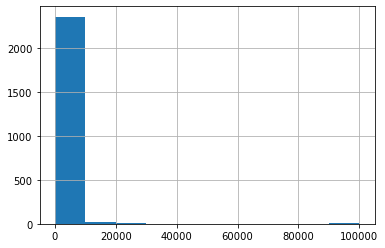

In [76]:
#tőkenyereség szélsőréték megtekintése
train['capital.gain'].hist(bins=10)

#Itt a logaritmus használata(vagy a manuális levágások) a szélsőértékek eltávolítására nem jó. 

Mert ezen számok esetén végtelen értékek is kialakulhatnak.

In [ ]:
train['education.num'].hist(bins=20)

Normális eloszlás van a fenti ábrán ezért itt nincs szükség levágásra

In [ ]:
train['relationship'].hist(bins=10)
#Nincsnenek túlságosan eltérő szélsőértékek

Itt nincs normális eloszlás, de szélső értékek se nagyon vannak ezért itt sincs szükség levágásra.

In [ ]:
#Optimalizált tanítás a szélső értékek leváságását követően (1. feladat leírása szerint)
model = RandomForestClassifier(n_estimators=100, min_samples_split=20, max_depth=20, max_features=2, min_samples_leaf=2)
predictor_var = ['fnlwgt_log','age_log','capital.gain','education.num','relationship']
classification_model(model, train, predictor_var, outcome_var)

A szélsőértékek jelenléte vagy hiánya nem okoz érdemi változást a becslésben.

In [ ]:
# Decision tree-vel tesztelve paraméterezve a levágott értékekből
model = DecisionTreeClassifier(random_state=None, min_samples_split=20, max_depth=20, max_features=2, min_samples_leaf=2)
predictor_var = ['fnlwgt_log','age_log','capital.gain','education.num','relationship']
classification_model(model, train, predictor_var, outcome_var)

# Gépi tanuló algoritmusok összehasonlítása (ugyanazon algoritmusok az első és a második feladatban)
Az első feladatban ezen algoritmusoknál az üres értékek nem lettek manupulálva, viszont a második feladatban már igen.

In [ ]:
#Validáció meghívása csak az oktatásra
outcome_var = 'target'
model = LogisticRegression()
predictor_var = ['education.num']
classification_model(model, train, predictor_var, outcome_var)

Az első feladatnál (vagyis ahol az üres sorokat meghagytam) ott 77,95% lett a pontosság és a cross validáció is.

In [ ]:
#Logisztikus regresszió, de most 5 paraméterrel
predictor_var = ['fnlwgt','age','capital.gain','education.num','relationship']
classification_model(LogisticRegression(), train, predictor_var, outcome_var)

Az első feladatban a pontsság 79,4% míg a cross validation 79,3% volt ugyanezen algoritmus esetén.

In [ ]:
#Összes változó paraméterként szerepel, illetve finomítva van a túltanult algoritmus
model = RandomForestClassifier(n_estimators=100, min_samples_split=20, max_depth=20, max_features=2, min_samples_leaf=2)
predictor_var = ['fnlwgt','age','capital.gain','education.num','relationship']
classification_model(model, train, predictor_var, outcome_var)

Az első feladatban a pontsság 87,9% míg a cross validation 84,67% volt ugyanezen algoritmus esetén.

In [ ]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['fnlwgt','age','capital.gain','education.num','relationship']
classification_model(model, train, predictor_var, outcome_var)

Az első feladatban a pontsság 84,6% míg a cross validation 84,3% volt ugyanezen algoritmus esetén.